# Final Project Submission

Student name: Wendy Mwiti

Student pace: Full tim

Instructor: Antonny Muiko/ Nikita Njoroge /William Okomba /Lucille Kaleha


#  Overview
I have been tasked by a real estate agency to provide insights regarding saleprices of houses. My objective is to make predictions about the sale prices of the houses based on certain house features so that the real estate agency can be able to advice on owners on what improvements they can make to their homes to maximise profits. I will be using several independent variables(predictors) against the target variable(price) to create regression models to achieve my objective

# Business Understanding
Many King County residents intend to sell their homes at the highest possible price with the real estate business becoming very profitable and competitive at the same time. A real estate agency is providing guidance to these homeowners about how home renovations might increase the estimated value of their homes and by what amount. The real estate agency requires information about what factors are important for determining a homes value.

# Data Understanding
This a dataset on houses in King County about the prices each house was sold for as well as the number of predictor variables

In [467]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import mlxtend
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression





# Column Names and Descriptions for King County Data Set
id - Unique identifier for a house

date - Date house was sold

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
condition - How good the overall condition of the house is. Related to maintenance of house.

grade - Overall grade of the house. Related to the construction and design of the house.

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [468]:
#Loading data
kc_house_df = pd.read_csv('data/kc_house_data.csv')
#preview first 5 rows
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [469]:
kc_house_df.info()#summary of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [470]:
#Dealing with data types
#preview a truncated version of the output with a for loop that will output
#5 most frequent entries and find out if the data types are encoded correctly
for col in kc_house_df.columns:
    try:
        print(col, kc_house_df[col].value_counts()[:5])
    except:
        print(col, kc_house_df[col].value_counts())
        

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64
date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64
price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64
bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64
sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64
sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64
floors

In [471]:
kc_house_df.describe()#sample statistics


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [472]:
#previewing the sum of empty values in different columns
kc_house_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Preparation
Here, I addressed missing values in waterfront with mode values, enginereed new columns including month, year, season, renovated and generally standardised the data types



In [473]:
#drop missing value in yr_renovated column
kc_house_df.dropna(subset=['yr_renovated'], axis=0, how='any', inplace=True )
#create new column renovated where if 0, then renovated
#otherwise if 1 not renovated
kc_house_df.loc[kc_house_df['yr_renovated'] > 0.0, 'renovated'] = 1
kc_house_df.loc[kc_house_df['yr_renovated'] == 0.0, 'renovated'] = 0
kc_house_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [474]:
#confirming there are no more missing values
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     15809 non-null  object 
 9   view           17704 non-null  object 
 10  condition      17755 non-null  object 
 11  grade          17755 non-null  object 
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

In [475]:
#fill in the missing values in the waterfront column with mode
kc_house_df.fillna(kc_house_df['waterfront'].mode()[0], inplace=True)
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [476]:
##fill in the missing values in the waterfront column with mode
kc_house_df.fillna(kc_house_df['view'].mode()[0], inplace=True)
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [477]:
#removing the value(?) in column sqft_basement
#then changing datatype
kc_house_df = kc_house_df[kc_house_df.sqft_basement != '?']
kc_house_df['sqft_basement'] = kc_house_df['sqft_basement'].astype("float")
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [478]:
#changing the dates to datetime objects and feature engineering a new column month
kc_house_df['date'] = pd.to_datetime(kc_house_df['date'])
kc_house_df['month'] = (kc_house_df['date']).dt.month
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,12
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [479]:
#feature engineering a new column year
kc_house_df['year'] = (kc_house_df['date']).dt.year
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,12,2014
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2,2015
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,5,2014
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,2,2015
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,6,2014
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1,2015


In [480]:
#dictionary that maps months to their season
seasons = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}

# Create a new column that contains the season that the movie was released in
kc_house_df['season'] = kc_house_df['month'].map(seasons)

kc_house_df.head() # Preview the updated 'release_time_df' DataFrame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month,year,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,0.0,10,2014,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,1.0,12,2014,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,0.0,12,2014,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,47.6168,-122.045,1800,7503,0.0,2,2015,Winter
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,0.0,98053,47.6561,-122.005,4760,101930,0.0,5,2014,Spring


In [481]:
#confirming there are no missing values
kc_house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
month            0
year             0
season           0
dtype: int64

In [482]:
#checking for any duplicates
kc_house_df.duplicated().sum()


0

### Checking for correlation structure of the data

In [483]:
#made a copy of the data without the target variable(price) to understand the correlation structure of the data
data_pred = kc_house_df.iloc[:, 3:21]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


In [484]:
#correlation matrix display
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.511008,0.574248,0.029735,0.178165,0.474933,0.302876,0.153804,0.019060,-0.148455,-0.005120,0.129010,0.391049,0.028926
bathrooms,0.511008,1.000000,0.753507,0.085359,0.503916,0.685987,0.280323,0.506520,0.051736,-0.202264,0.028378,0.223547,0.570498,0.086527
sqft_living,0.574248,0.753507,1.000000,0.167750,0.356548,0.875884,0.436372,0.317290,0.054291,-0.199536,0.056543,0.240605,0.758152,0.181103
sqft_lot,0.029735,0.085359,0.167750,1.000000,-0.008821,0.175689,0.019574,0.048992,0.003491,-0.128804,-0.084144,0.232859,0.142904,0.718213
floors,0.178165,0.503916,0.356548,-0.008821,1.000000,0.527164,-0.245083,0.487763,0.003256,-0.058286,0.053843,0.128350,0.282055,-0.012813
sqft_above,0.474933,0.685987,0.875884,0.175689,0.527164,1.000000,-0.051945,0.423151,0.020792,-0.260310,0.004532,0.343817,0.731872,0.190892
sqft_basement,0.302876,0.280323,0.436372,0.019574,-0.245083,-0.051945,1.000000,-0.132378,0.073591,0.072435,0.108573,-0.143154,0.204374,0.018858
yr_built,0.153804,0.506520,0.317290,0.048992,0.487763,0.423151,-0.132378,1.000000,-0.222608,-0.345632,-0.147657,0.407989,0.322809,0.071367
yr_renovated,0.019060,0.051736,0.054291,0.003491,0.003256,0.020792,0.073591,-0.222608,1.000000,0.069022,0.033822,-0.071711,0.000366,0.002235
zipcode,-0.148455,-0.202264,-0.199536,-0.128804,-0.058286,-0.260310,0.072435,-0.345632,0.069022,1.000000,0.264867,-0.562715,-0.279289,-0.146638


In [485]:
# a neat fix is to use stack and a subset to return only the highly correlated pairs.
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [486]:
#correlations are considered high with an absolute value of 0.7-0.8 or higher
df[(df.cc>.7) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.875884
"(sqft_living15, sqft_living)",0.758152
"(sqft_living, bathrooms)",0.753507
"(sqft_above, sqft_living15)",0.731872
"(sqft_lot, sqft_lot15)",0.718213


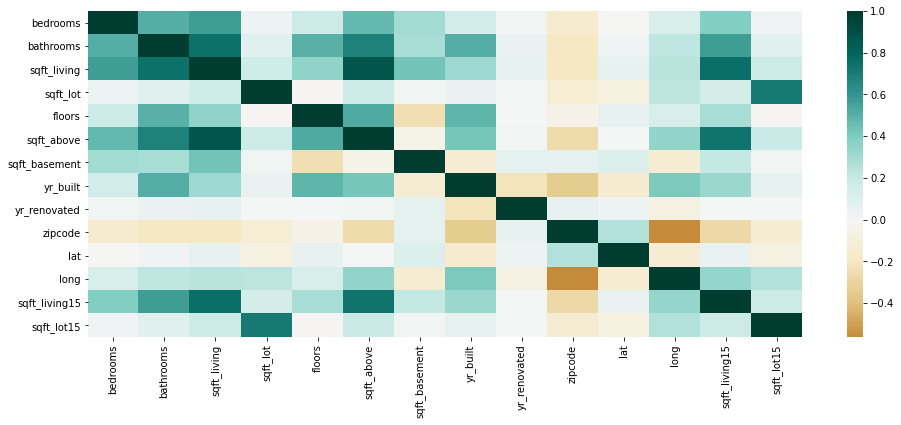

In [540]:
#visualizing the multicollinearity in a heat map
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(data_pred.corr(), center=0, cbar=True, cmap='BrBG');


#### Dropping certain columns to avoid multicollinearity issues in my models
There is a high correlation between sqft_above and sqft_living, sqft_living15 and sqft_living, sqft_living and bathrooms, sqft_above and sqft_living15
 
 To avoid multicollinearity issues bringing problems in my models I decided to drop I'm going to drop sqft_living, sqft_above and sqft_lot15

### Creating a dataframe for numerical features only

In [488]:
#numerical_df = kc_house_df.copy()
numerical_df = kc_house_df[['price','bedrooms', 'bathrooms', 'sqft_lot', 'sqft_basement','floors', 'sqft_above',
              'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living' ]]
numerical_df.drop(['sqft_above', 'sqft_living', 'sqft_lot15'], axis=1, inplace=True)
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17389 non-null  float64
 1   bedrooms       17389 non-null  int64  
 2   bathrooms      17389 non-null  float64
 3   sqft_lot       17389 non-null  int64  
 4   sqft_basement  17389 non-null  float64
 5   floors         17389 non-null  float64
 6   lat            17389 non-null  float64
 7   long           17389 non-null  float64
 8   sqft_living15  17389 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.3 MB


### Coarse Classification

In [489]:
#coarse classification of yr_built
kc_house_df.yr_built.describe()

count    17389.000000
mean      1971.126114
std         29.311899
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

<AxesSubplot:>

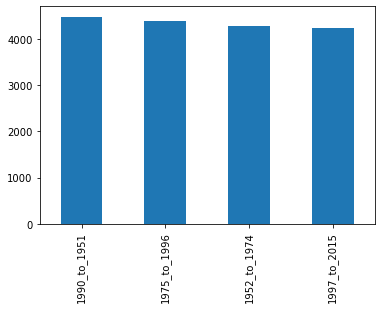

In [541]:
bins = [1900, 1952, 1975, 1997, 2015]
yr_built_bins = pd.cut(kc_house_df['yr_built'], bins, include_lowest = True, 
                       labels=('1990_to_1951', '1952_to_1974', '1975_to_1996', '1997_to_2015'), ordered=False)

yr_built_bins.value_counts().plot(kind='bar')

### Building a categorical dataframe

In [491]:
categorical_df = kc_house_df[['waterfront', 'view', 'condition', 'grade', 'renovated', 'season']]
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  17389 non-null  object 
 1   view        17389 non-null  object 
 2   condition   17389 non-null  object 
 3   grade       17389 non-null  object 
 4   renovated   17389 non-null  float64
 5   season      17389 non-null  object 
dtypes: float64(1), object(5)
memory usage: 951.0+ KB


In [492]:
categorical_df['renovated'] = categorical_df['renovated'].astype('str')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   waterfront  17389 non-null  object
 1   view        17389 non-null  object
 2   condition   17389 non-null  object
 3   grade       17389 non-null  object
 4   renovated   17389 non-null  object
 5   season      17389 non-null  object
dtypes: object(6)
memory usage: 951.0+ KB


In [493]:
categorical_df = pd.concat([categorical_df, yr_built_bins], axis = 1)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   waterfront  17389 non-null  object  
 1   view        17389 non-null  object  
 2   condition   17389 non-null  object  
 3   grade       17389 non-null  object  
 4   renovated   17389 non-null  object  
 5   season      17389 non-null  object  
 6   yr_built    17389 non-null  category
dtypes: category(1), object(6)
memory usage: 968.1+ KB


### Separate dataframe for zipcodes

In [494]:
kc_house_df['zipcode'].unique()
zip_df = pd.get_dummies(kc_house_df, columns=['zipcode'], drop_first=True)
zip_df.drop(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'lat', 'long', 'month', 'year', 'season', 'renovated', 'sqft_living15', 'sqft_lot15'], axis=1, inplace = True)


In [495]:
x_iterated = zip_df.columns
x_iterated

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [496]:
#one hot encode variables 
one_hot_df = pd.get_dummies(categorical_df, drop_first=True)
one_hot_df.isna().sum()

waterfront_YES           0
view_EXCELLENT           0
view_FAIR                0
view_GOOD                0
view_NO                  0
view_NONE                0
condition_Fair           0
condition_Good           0
condition_Poor           0
condition_Very Good      0
grade_11 Excellent       0
grade_12 Luxury          0
grade_13 Mansion         0
grade_3 Poor             0
grade_4 Low              0
grade_5 Fair             0
grade_6 Low Average      0
grade_7 Average          0
grade_8 Good             0
grade_9 Better           0
renovated_1.0            0
season_Spring            0
season_Summer            0
season_Winter            0
yr_built_1952_to_1974    0
yr_built_1975_to_1996    0
yr_built_1997_to_2015    0
dtype: int64

# Checking for data distribution using histograms

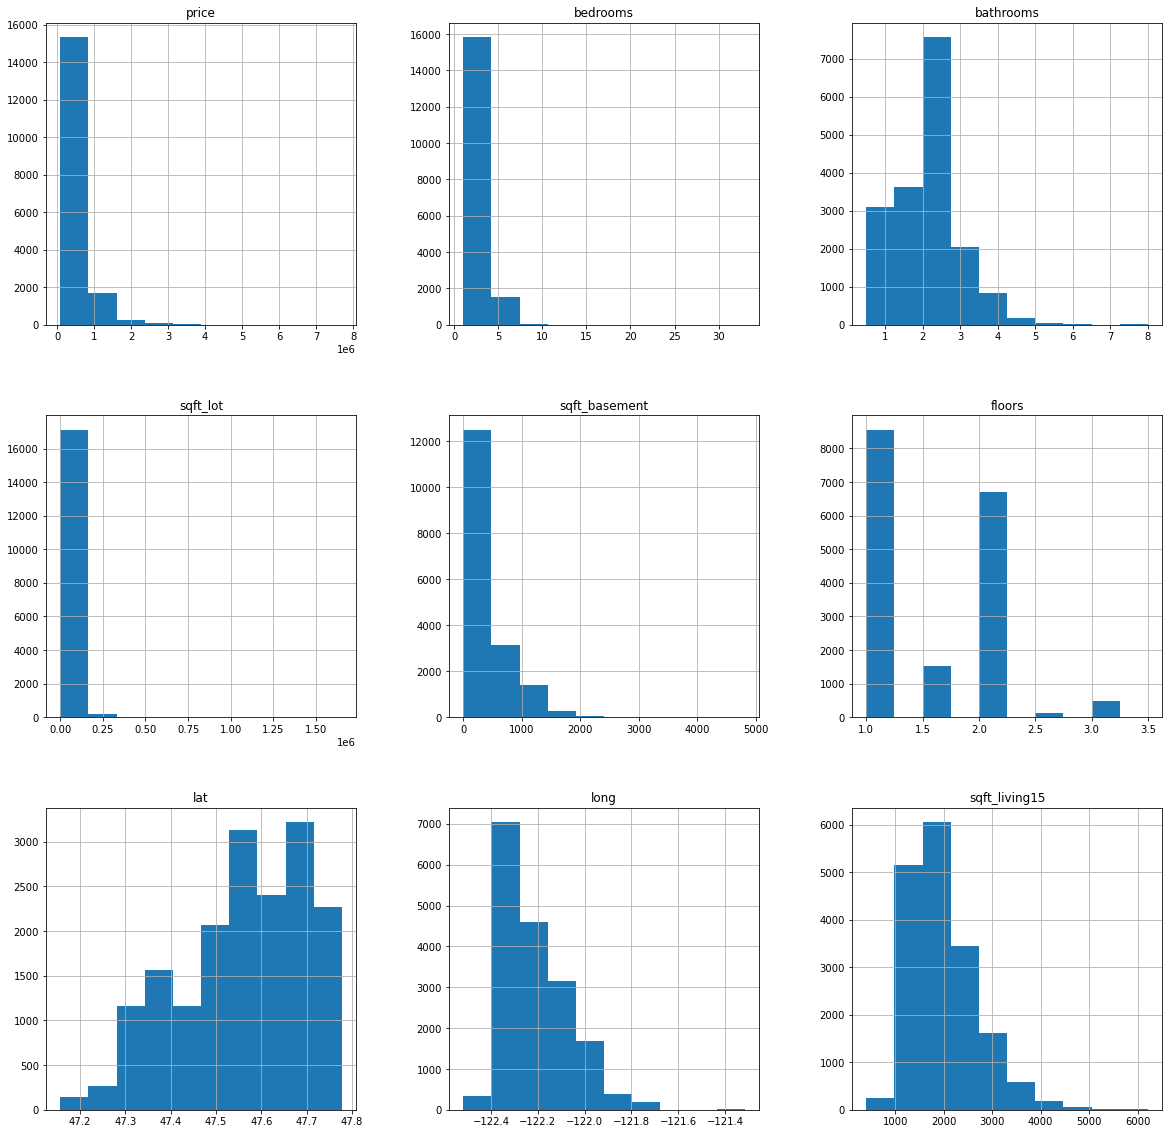

In [497]:
numerical_df.hist(figsize=(20,20));

# Log transformation of certain features
Since these features did not follow a linear distribution I was comfortable log transforming them to reduce skewness and map them as close to normal distributions as possible.

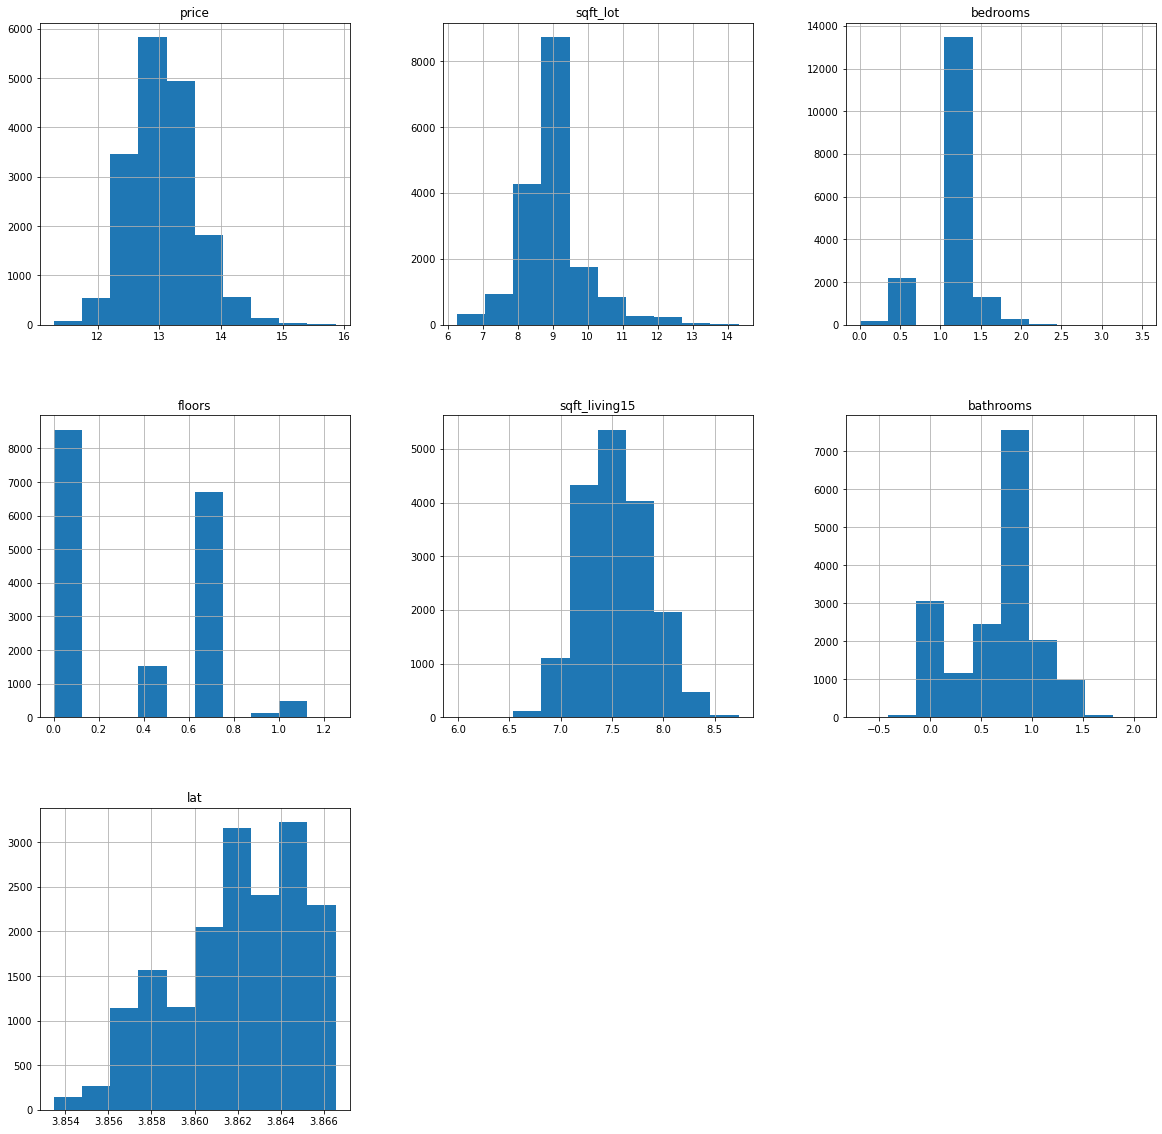

In [498]:
numerical_df=np.log(numerical_df[['price', 'sqft_lot', 'bedrooms', 'floors',
                                  'sqft_living15', 'bathrooms', 'lat']])
numerical_df.hist(figsize=(20, 20));

# Scaling lat, long and sqft_basement features
With these features having a larger variance than the others I opted to centre them around the mean and scale them by dividing with the standard deviation

In [499]:
numerical_df['sqft_basement']= (kc_house_df['sqft_basement'] 
                                - kc_house_df['sqft_basement'].mean())/kc_house_df['sqft_basement'].std()

numerical_df['lat']= (kc_house_df['lat']
                      - kc_house_df['lat'].mean())/kc_house_df['lat'].std()

numerical_df['long']= (kc_house_df['long'] 
                       - kc_house_df['long'].mean())/kc_house_df['long'].std()




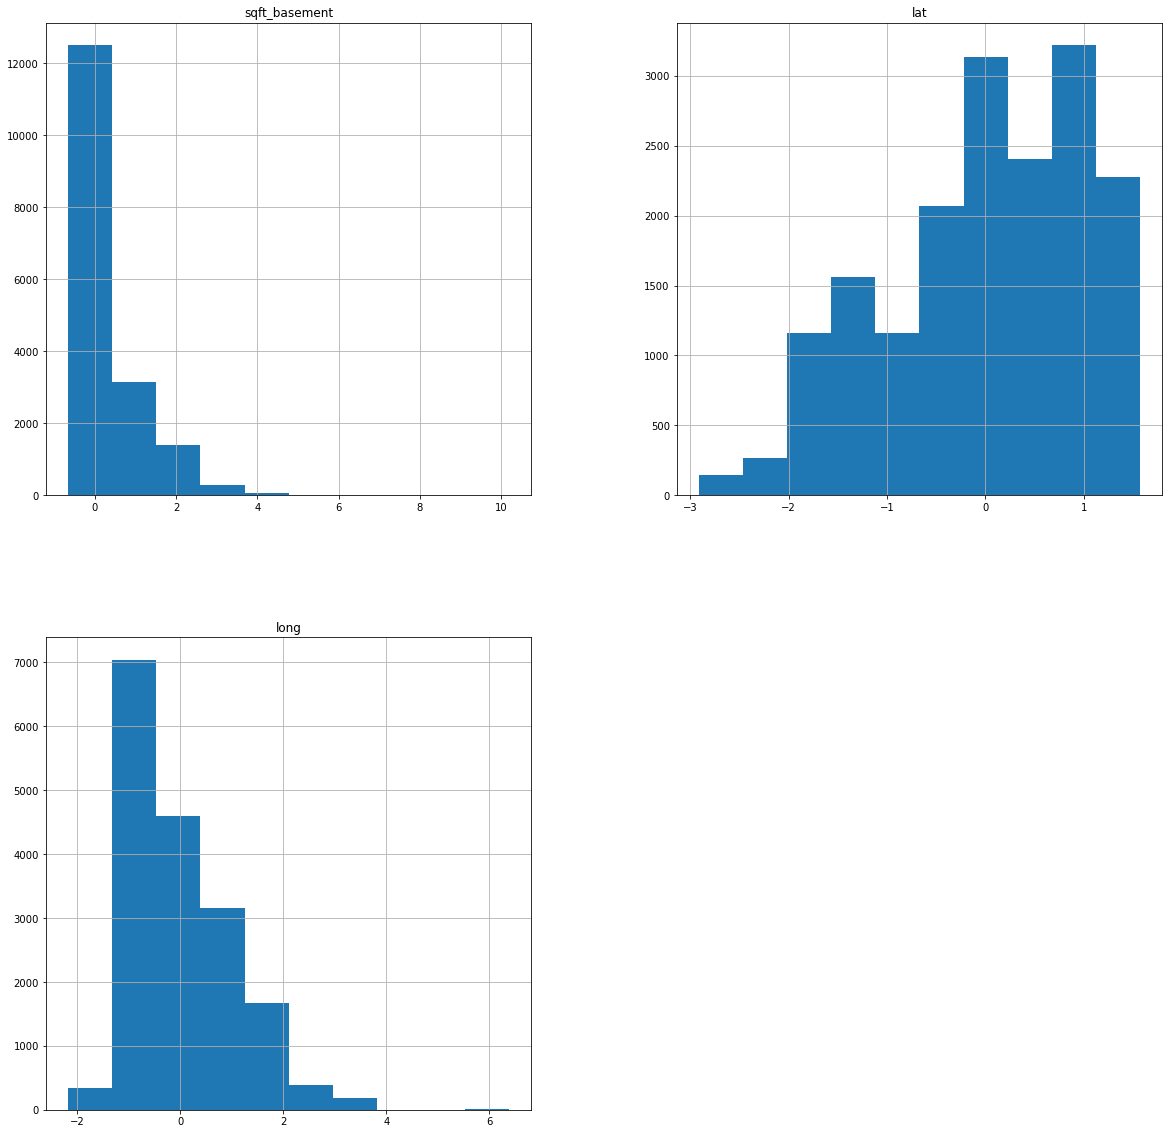

In [500]:
numerical_df[['sqft_basement', 'lat', 'long']].hist(figsize=(20,20));

In [501]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17389 non-null  float64
 1   sqft_lot       17389 non-null  float64
 2   bedrooms       17389 non-null  float64
 3   floors         17389 non-null  float64
 4   sqft_living15  17389 non-null  float64
 5   bathrooms      17389 non-null  float64
 6   lat            17389 non-null  float64
 7   sqft_basement  17389 non-null  float64
 8   long           17389 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


# Joint Plots
Here, I used joint plots which allowed me to visualize a scatterplot, the distributions of two different columns, a KDE plot and even a simple regression line all on the same visualization. This was incredibly useful for handy checking the linearity assumption between predictors and a target variable during a regression analysis.

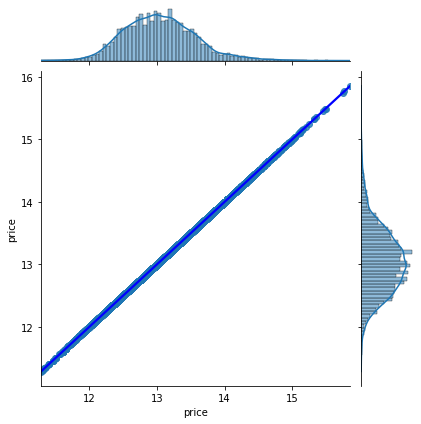

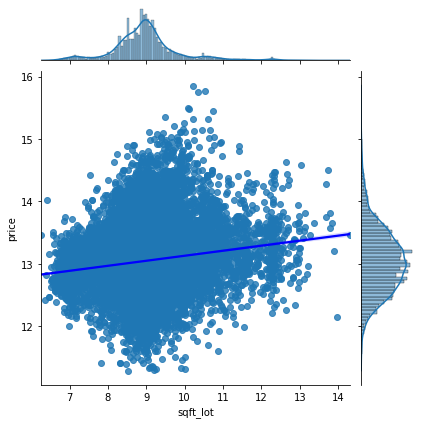

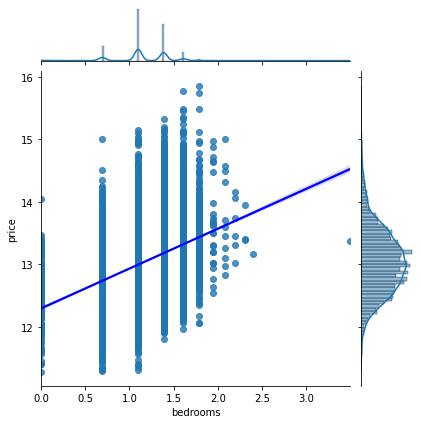

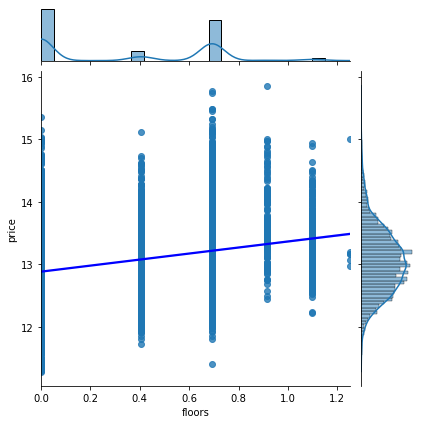

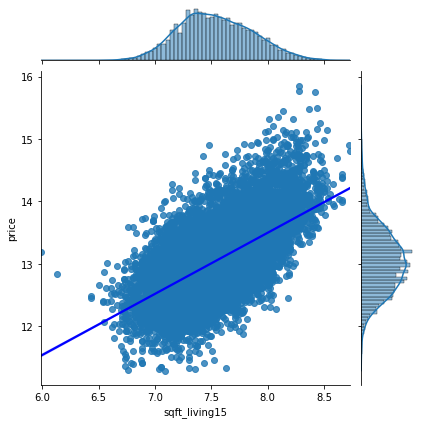

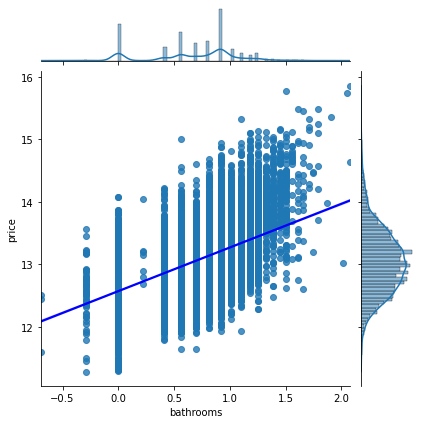

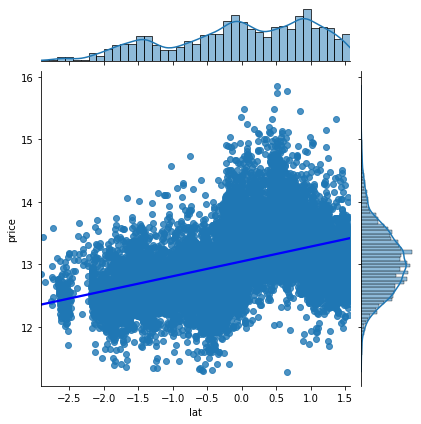

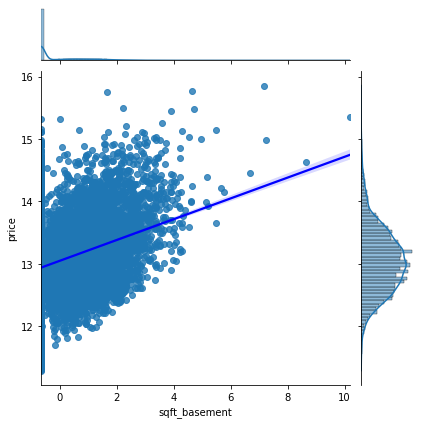

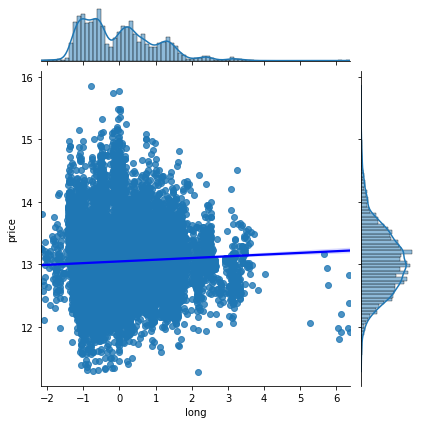

In [502]:
#examining linearity in our numerical data using joint plots
#create a list of columns of our numerical df
num_list = list(numerical_df)
#for loop to iterate over the columns
for column in num_list:
    sns.jointplot(x=column, y='price',
                  data=numerical_df,
                  kind='reg',
                  label=column,
                  joint_kws={'line_kws' :{'color':'blue'}})#price is our target variable
                                                    
                                          

In [503]:
#Here i merged all my three dfs
merged_df = pd.concat([one_hot_df, numerical_df, zip_df], axis=1)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Columns: 105 entries, waterfront_YES to zipcode_98199
dtypes: float64(9), uint8(96)
memory usage: 2.9 MB


In [504]:
merged_df.isna().sum()

waterfront_YES    0
view_EXCELLENT    0
view_FAIR         0
view_GOOD         0
view_NO           0
                 ..
zipcode_98177     0
zipcode_98178     0
zipcode_98188     0
zipcode_98198     0
zipcode_98199     0
Length: 105, dtype: int64

# Baseline Model
To build my first model i looked at the correlation of the features with price. sqft_living15 being the highest correlated with price, made the first predictor. Thereafter, I added several independent features and finally did feature selection

In [505]:
#data correlation with price to help us build baseline model
numerical_df.corr()['price']

price            1.000000
sqft_lot         0.138448
bedrooms         0.342806
floors           0.322394
sqft_living15    0.609517
bathrooms        0.518829
lat              0.450463
sqft_basement    0.316768
long             0.051810
Name: price, dtype: float64

In [506]:
y = merged_df["price"]
X_baseline = merged_df[["sqft_living15"]]

In [507]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 1.028e+04
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:03   Log-Likelihood:                -9467.2
No. Observations:               17389   AIC:                         1.894e+04
Df Residuals:                   17387   BIC:                         1.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6643      0.073     77.687

In [508]:
#adding another independent variable
X_second = merged_df[['sqft_living15', 'bathrooms']]


In [509]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     6155.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:03   Log-Likelihood:                -8850.4
No. Observations:               17389   AIC:                         1.771e+04
Df Residuals:                   17386   BIC:                         1.773e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.1858      0.082     87.376

In [510]:
X_third = merged_df[['sqft_living15', 'lat', 'bathrooms']]

In [511]:
third_model = sm.OLS(y, sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     8579.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:03   Log-Likelihood:                -5607.0
No. Observations:               17389   AIC:                         1.122e+04
Df Residuals:                   17385   BIC:                         1.125e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4513      0.068    109.074

In [512]:
X_forth = merged_df[['sqft_living15', 'lat', 'bathrooms', 'floors']]

In [513]:
forth_model = sm.OLS(y, sm.add_constant(X_forth))
forth_results = forth_model.fit()

print(forth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6485.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:03   Log-Likelihood:                -5565.6
No. Observations:               17389   AIC:                         1.114e+04
Df Residuals:                   17384   BIC:                         1.118e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4564      0.068    109.403

In [514]:
X_five = merged_df[['sqft_living15', 'lat', 'bathrooms', 'floors', 'sqft_basement']]

In [515]:
five_model = sm.OLS(y, sm.add_constant(X_five))
five_results = five_model.fit()

print(five_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5721.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:04   Log-Likelihood:                -5046.6
No. Observations:               17389   AIC:                         1.011e+04
Df Residuals:                   17383   BIC:                         1.015e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.6785      0.067    115.464

In [516]:
X_six = merged_df[['sqft_living15', 'lat', 'bathrooms', 'floors', 'sqft_basement', 'long']]

In [517]:
six_model = sm.OLS(y, sm.add_constant(X_six))
six_results = six_model.fit()

print(six_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4891.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:04   Log-Likelihood:                -4907.7
No. Observations:               17389   AIC:                             9829.
Df Residuals:                   17382   BIC:                             9884.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3226      0.069    105.638

In [518]:
X_seven = merged_df[['sqft_living15', 'lat', 'bathrooms', 'floors', 'sqft_basement', 'long', 'zipcode_98002', 
                    'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 
                    'zipcode_98007','zipcode_98008', 'zipcode_98010', 'zipcode_98011', 
                    'zipcode_98014', 'zipcode_98019', 'zipcode_98022','zipcode_98023',
                    'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 
                    'zipcode_98030','zipcode_98031', 'zipcode_98032', 'zipcode_98033', 
                    'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 
                    'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 
                    'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98065',
                    'zipcode_98070', 'zipcode_98072', 'zipcode_98074',  'zipcode_98075',
                    'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 
                    'zipcode_98105',  'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 
                    'zipcode_98109', 'zipcode_98112', 'zipcode_98115','zipcode_98116',
                    'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
                    'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 
                    'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
                    'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
                    'zipcode_98198', 'zipcode_98199' ]]

In [519]:
seven_model = sm.OLS(y, sm.add_constant(X_seven))
seven_results = seven_model.fit()

print(seven_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     844.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:04   Log-Likelihood:                -219.93
No. Observations:               17389   AIC:                             589.9
Df Residuals:                   17314   BIC:                             1172.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8444      0.062    126.283

In [520]:
X_eight = merged_df[['sqft_living15', 'lat', 'bathrooms', 'floors', 'sqft_basement', 'long', 
                     'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
                     'zipcode_98006',  'zipcode_98007','zipcode_98008', 'zipcode_98010', 
                     'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
                     'zipcode_98023','zipcode_98024', 'zipcode_98027', 'zipcode_98028', 
                     'zipcode_98029', 'zipcode_98030','zipcode_98031', 'zipcode_98032',
                     'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 
                     'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
                     'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 
                     'zipcode_98065','zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
                     'zipcode_98075','zipcode_98077', 'zipcode_98092', 'zipcode_98102',
                     'zipcode_98103', 'zipcode_98105',  'zipcode_98106', 'zipcode_98107',
                     'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
                     'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 
                     'zipcode_98122','zipcode_98125', 'zipcode_98126', 'zipcode_98133', 
                     'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 
                     'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 
                     'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199', 
                     'waterfront_YES', 'view_EXCELLENT','view_FAIR', 'view_GOOD','view_NO',
                     'view_NONE', 'condition_Fair','condition_Good', 'condition_Poor',
                     'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 
                     'grade_13 Mansion', 'grade_3 Poor','grade_4 Low', 'grade_5 Fair',
                     'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
                     'grade_9 Better', 'renovated_1.0', 'season_Spring', 'season_Summer',
                     'season_Winter', 'yr_built_1952_to_1974', 'yr_built_1975_to_1996', 
                     'yr_built_1997_to_2015']]

In [521]:
eight_model = sm.OLS(y, sm.add_constant(X_eight))
eight_results = eight_model.fit()

print(eight_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1026.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:05   Log-Likelihood:                 3406.6
No. Observations:               17389   AIC:                            -6609.
Df Residuals:                   17287   BIC:                            -5817.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.73

### Feature selection by training the model 

In [542]:
X = merged_df.iloc[:, 0:106]
y = merged_df['price']

In [543]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
sfs1 = sfs(LR, k_features = 5, forward=True, floating=False, scoring='r2', verbose=2, cv=5)
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    2.0s finished

[2022-10-04 23:33:44] Features: 1/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:    3.0s finished

[2022-10-04 23:33:47] Features: 2/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    3.1s finished

[2022-10-04 23:33:50] Features: 3/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

In [545]:
sfs1.k_feature_names_ #best 5 features

('waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'price')

In [546]:
X_final = merged_df[['waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD']]

In [547]:
final_model = sm.OLS(y, sm.add_constant(X_final))
final_results = final_model.fit()

print(final_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     441.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:33:56   Log-Likelihood:                -12665.
No. Observations:               17389   AIC:                         2.534e+04
Df Residuals:                   17384   BIC:                         2.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0135      0.004   3331.

In [529]:
final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     441.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:24   Log-Likelihood:                -12665.
No. Observations:               17389   AIC:                         2.534e+04
Df Residuals:                   17384   BIC:                         2.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0135      0.004   3331.025      0.000      13.006      13.021
waterfront_YES     0.3434      0.057      6.055      0.000       0.232       0.455
view_EXCELLENT     0.8545      0.039     22.121      0.000       0.779       0.930
view_FAIR          0.4459      0.031     14.602      0.000       0.386       0.506
view_GOOD          0.6164      0.026     24.052      0.000       0.566       0.667
==============================================================================
Omnibus:                      339.658   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.416
Skew:                           0.295   Prob(JB):                     1.37e-86
Kurtosis:                       3.445   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the model with Mean absolute Error

In [537]:
y = merged_df['price']
y_pred = final_results.predict(sm.add_constant(X_final)) # use fitted model to generate predictions for y

In [538]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y, y_pred)

0.3971117585626805

### MAE Interpretation
Unlike R-Squared, the units of MAE are in the units of  𝑦 . Our target variable is price, so this result is in dollars.

For this specific MAE value, it means that our model is off by about 0.397 dollars in a given prediction.

The lower the MAE the better



# Conclusion

# Model results
1.The model is statistically significant overall, with an F-statistic p-value well below 0.05

2.The model explains about 92% of the variance in price as indicated by R-squared

3.waterfront_YES, view_Excellent, view_FAIR, view_GOOD are all statistically significant with p values below 0.05

4.With all else constant, for each increase in 1 unit waterfront_YES(house that is on a waterfront) we expect price to increase by about 34.34%

5.With all else being constant, for each increase in 1 unit view_EXCELLENT we expect price to decrease by about 85.45%

6. With all else being constant, for each increase in 1 unit view_FAIR we expect price to increase by about 44.59%


7. With all else being constant, for each increase in 1 unit view_GOOD we expect price to increase by about 61.64%


8. The model coefficients are statistically significant with the probability of their t-tests  being 0.000 which is well below 0.005



# Recommendations
Home owners should aim to have:

a)Houses with an excellent view

b)Houses with a good view

c)Houses with a fair view

d)Houses on the waterfront

The view feature includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other


# Next Steps
1)Introduce other variables based on housing trends such as mortgage rates

2) Create a similar tool for buyers so that helps them decide what price they should offer for houses